In [36]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Position_Salaries.csv')

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.shape

(10, 3)

In [5]:
X = df.iloc[:, 1:2].values
Y = df.iloc[:, 2].values

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [8]:
print("The shape of X: {}".format(X.shape))
print("The shape of Y: {}".format(Y.shape))

The shape of X: (10, 1)
The shape of Y: (10,)


In [11]:
#Reshaping Y
Y = Y.reshape(10, -1)

In [12]:
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [15]:
#Standardizing The data
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [19]:
#Standardized values
print("X:\n {} \n".format(X))
print("Y:\n {}".format(Y))

X:
 [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

Y:
 [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [21]:
#Training The Model
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X, Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
#Testing Out Results
y_pred = svr_regressor.predict(X)
y_pred = sc_y.inverse_transform(y_pred)

print("Result is: {}".format(y_pred))

Result is: [-0.61985717 -0.629033   -0.56735658 -0.49662252 -0.44630564 -0.36590427
 -0.14129748  0.28510258  0.78163737  1.08500645]


In [37]:
# The mean squared error
print("The Mean Squared Error is: %.2f" % mean_squared_error(Y, y_pred))
# Explained variance score: 1 is perfect prediction
print("Variance Score: %.2f" % r2_score(Y, y_pred))
#Accuracy
acc = (r2_score(Y, y_pred)*100).astype('int32')
print("Accuracy is: {}%".format(acc))

The Mean Squared Error is: 0.25
Variance Score: 0.75
Accuracy is: 75%


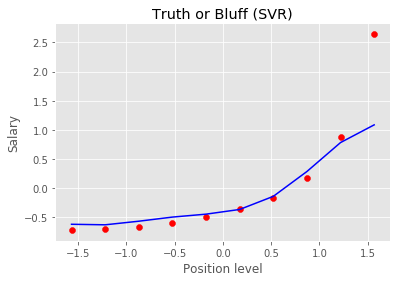

In [31]:
# Visualising the SVR results
plt.scatter(X, Y, color = 'red')
plt.plot(X, svr_regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

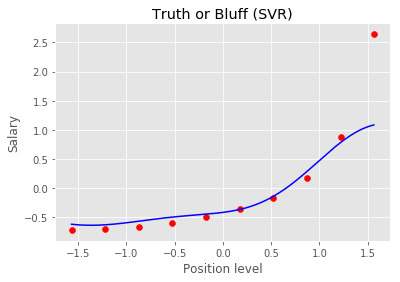

In [32]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, svr_regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()